# Laptop Price Prediction - Regression

In this project I used machine learning techniques to predict laptop prices based on their specifications.

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("laptop_data.csv")

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Feature Engineering
Created new features

In [5]:
import re
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS_Display'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['Resolution_Type'] = df['ScreenResolution'].apply(lambda x: re.findall(r'(Full HD|Quad HD\+|4K Ultra HD|HD|Retina)', x)[0] if re.findall(r'(Full HD|Quad HD\+|4K Ultra HD|HD|Retina)', x) else None)
df['Resolution_Width'] = df['ScreenResolution'].apply(lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else None)
df['Resolution_Height'] = df['ScreenResolution'].apply(lambda x: re.findall(r'\d+', x)[1] if re.findall(r'\d+', x) else None)

In [6]:
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])
df['Cpu_Model'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[2:-1]))
df['Cpu_Speed'] = df['Cpu'].apply(lambda x: x.split()[-1])

In [7]:
df['Memory_Type'] = df['Memory'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)
df['Memory_Capacity'] = df['Memory'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else None)

In [8]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else None)
df['Gpu_Model'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[1:]) if len(x.split()) > 2 else (x.split()[1] if len(x.split()) == 2 else None))

In [9]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Display,Resolution_Type,Resolution_Width,Resolution_Height,Cpu_Brand,Cpu_Model,Cpu_Speed,Memory_Type,Memory_Capacity,Gpu_Brand,Gpu_Model
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,Retina,2560,1600,Intel,i5,2.3GHz,SSD,128GB,Intel,Iris Plus Graphics 640
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,None,1440,900,Intel,i5,1.8GHz,Flash,128GB,Intel,HD Graphics 6000
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,Full HD,1920,1080,Intel,i5 7200U,2.5GHz,SSD,256GB,Intel,HD Graphics 620
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,Retina,2880,1800,Intel,i7,2.7GHz,SSD,512GB,AMD,Radeon Pro 455
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,Retina,2560,1600,Intel,i5,3.1GHz,SSD,256GB,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,Full HD,1920,1080,Intel,i7 6500U,2.5GHz,SSD,128GB,Intel,HD Graphics 520
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,Quad HD+,3200,1800,Intel,i7 6500U,2.5GHz,SSD,512GB,Intel,HD Graphics 520
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,None,1366,768,Intel,Dual Core N3050,1.6GHz,Flash,64GB,Intel,HD Graphics
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,None,1366,768,Intel,i7 6500U,2.5GHz,HDD,1TB,AMD,Radeon R5 M330


In [10]:
df['Memory_Capacity'] = df['Memory_Capacity'].str.replace('.0', '')
df['Memory_Capacity'] = df['Memory_Capacity'].str.replace('GB', '')
df['Memory_Capacity'] = df['Memory_Capacity'].str.replace('TB', '000')
df['Ram']=df['Ram'].str.replace('GB','')
df['Cpu_Speed']=df['Cpu_Speed'].str.replace('GHz','')
df['Weight']=df['Weight'].str.replace('kg','')
df['Resolution_Width'] = df['Resolution_Width']
df['Resolution_Height'] = df['Resolution_Height']

In [11]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Display,Resolution_Type,Resolution_Width,Resolution_Height,Cpu_Brand,Cpu_Model,Cpu_Speed,Memory_Type,Memory_Capacity,Gpu_Brand,Gpu_Model
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Retina,2560,1600,Intel,i5,2.3,SSD,128,Intel,Iris Plus Graphics 640
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,None,1440,900,Intel,i5,1.8,Flash,128,Intel,HD Graphics 6000
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD,1920,1080,Intel,i5 7200U,2.5,SSD,256,Intel,HD Graphics 620
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Retina,2880,1800,Intel,i7,2.7,SSD,512,AMD,Radeon Pro 455
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Retina,2560,1600,Intel,i5,3.1,SSD,256,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,1,1,Full HD,1920,1080,Intel,i7 6500U,2.5,SSD,128,Intel,HD Graphics 520
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,1,1,Quad HD+,3200,1800,Intel,i7 6500U,2.5,SSD,512,Intel,HD Graphics 520
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,0,0,None,1366,768,Intel,Dual Core N3050,1.6,Flash,64,Intel,HD Graphics
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,None,1366,768,Intel,i7 6500U,2.5,HDD,1000,AMD,Radeon R5 M330


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1303 non-null   int64  
 1   Company            1303 non-null   object 
 2   TypeName           1303 non-null   object 
 3   Inches             1303 non-null   float64
 4   ScreenResolution   1303 non-null   object 
 5   Cpu                1303 non-null   object 
 6   Ram                1303 non-null   object 
 7   Memory             1303 non-null   object 
 8   Gpu                1303 non-null   object 
 9   OpSys              1303 non-null   object 
 10  Weight             1303 non-null   object 
 11  Price              1303 non-null   float64
 12  TouchScreen        1303 non-null   int64  
 13  IPS_Display        1303 non-null   int64  
 14  Resolution_Type    933 non-null    object 
 15  Resolution_Width   1303 non-null   object 
 16  Resolution_Height  1303 

In [13]:
float_columns = ['Memory_Capacity','Ram','Cpu_Speed','Weight','Resolution_Width','Resolution_Height']
for col in float_columns:
    df[col] = df[col].astype(float)

In [14]:
df['OpSys_Type'] = df['OpSys'].apply(lambda x: x.split()[0])
df['OpSys_Version'] = df['OpSys'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

In [15]:
df=df.drop(['ScreenResolution','Cpu','Memory','Gpu','OpSys','Unnamed: 0'],axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Ram                1303 non-null   float64
 4   Weight             1303 non-null   float64
 5   Price              1303 non-null   float64
 6   TouchScreen        1303 non-null   int64  
 7   IPS_Display        1303 non-null   int64  
 8   Resolution_Type    933 non-null    object 
 9   Resolution_Width   1303 non-null   float64
 10  Resolution_Height  1303 non-null   float64
 11  Cpu_Brand          1303 non-null   object 
 12  Cpu_Model          1303 non-null   object 
 13  Cpu_Speed          1303 non-null   float64
 14  Memory_Type        1303 non-null   object 
 15  Memory_Capacity    1303 non-null   float64
 16  Gpu_Brand          1303 

In [17]:
df

,Company,TypeName,Inches,Ram,Weight,Price,TouchScreen,IPS_Display,Resolution_Type,Resolution_Width,Resolution_Height,Cpu_Brand,Cpu_Model,Cpu_Speed,Memory_Type,Memory_Capacity,Gpu_Brand,Gpu_Model,OpSys_Type,OpSys_Version
0,Apple,Ultrabook,13.3,8.0,1.37,71378.6832,0,1,Retina,2560.0,1600.0,Intel,i5,2.3,SSD,128.0,Intel,Iris Plus Graphics 640,macOS,None
1,Apple,Ultrabook,13.3,8.0,1.34,47895.5232,0,0,None,1440.0,900.0,Intel,i5,1.8,Flash,128.0,Intel,HD Graphics 6000,macOS,None
2,HP,Notebook,15.6,8.0,1.86,30636.0000,0,0,Full HD,1920.0,1080.0,Intel,i5 7200U,2.5,SSD,256.0,Intel,HD Graphics 620,No,OS
3,Apple,Ultrabook,15.4,16.0,1.83,135195.3360,0,1,Retina,2880.0,1800.0,Intel,i7,2.7,SSD,512.0,AMD,Radeon Pro 455,macOS,None
4,Apple,Ultrabook,13.3,8.0,1.37,96095.8080,0,1,Retina,2560.0,1600.0,Intel,i5,3.1,SSD,256.0,Intel,Iris Plus Graphics 650,macOS,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4.0,1.80,33992.6400,1,1,Full HD,1920.0,1080.0,Intel,i7 6500U,2.5,SSD,128.0,Intel,HD Graphics 520,Windows,10
1299,Lenovo,2 in 1 Convertible,13.3,16.0,1.30,79866.7200,1,1,Quad HD+,3200.0,1800.0,Intel,i7 6500U,2.5,SSD,512.0,Intel,HD Graphics 520,Windows,10
1300,Lenovo,Notebook,14.0,2.0,1.50,12201.1200,0,0,None,1366.0,768.0,Intel,Dual Core N3050,1.6,Flash,64.0,Intel,HD Graphics,Windows,10
1301,HP,Notebook,15.6,6.0,2.19,40705.9200,0,0,None,1366.0,768.0,Intel,i7 6500U,2.5,HDD,1000.0,AMD,Radeon R5 M330,Windows,10


### Data Visualization

<Axes: xlabel='Price', ylabel='Density'>

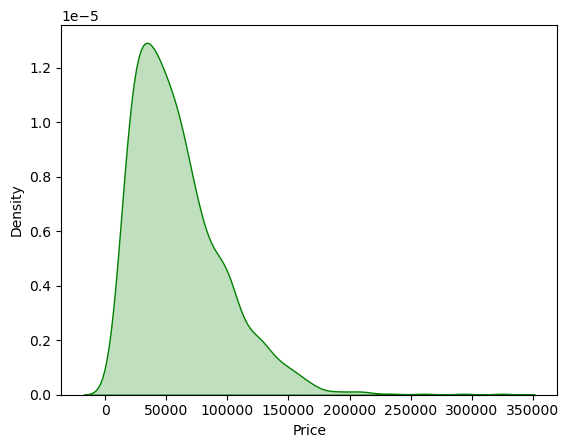

In [18]:
sns.kdeplot(x=df['Price'], fill=True, color='green')

<Axes: xlabel='Price'>

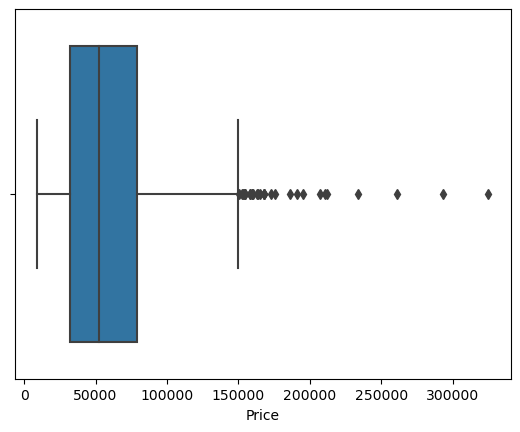

In [19]:
#Outliers
sns.boxplot(x=df['Price'])

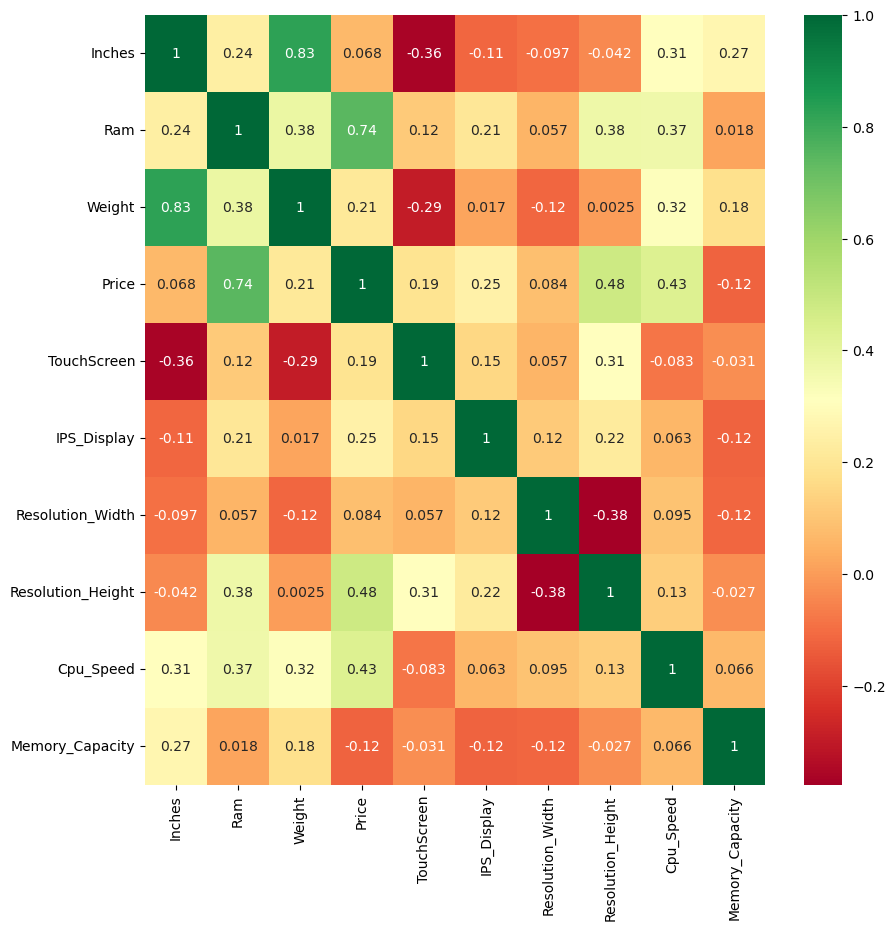

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='RdYlGn');

### Preprocessing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Ram                1303 non-null   float64
 4   Weight             1303 non-null   float64
 5   Price              1303 non-null   float64
 6   TouchScreen        1303 non-null   int64  
 7   IPS_Display        1303 non-null   int64  
 8   Resolution_Type    933 non-null    object 
 9   Resolution_Width   1303 non-null   float64
 10  Resolution_Height  1303 non-null   float64
 11  Cpu_Brand          1303 non-null   object 
 12  Cpu_Model          1303 non-null   object 
 13  Cpu_Speed          1303 non-null   float64
 14  Memory_Type        1303 non-null   object 
 15  Memory_Capacity    1303 non-null   float64
 16  Gpu_Brand          1303 

In [22]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [23]:
x=pd.get_dummies(x)

In [24]:
x

,Inches,Ram,Weight,TouchScreen,IPS_Display,Resolution_Width,Resolution_Height,Cpu_Speed,Memory_Capacity,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Resolution_Type_4K Ultra HD,Resolution_Type_Full HD,Resolution_Type_Quad HD+,Resolution_Type_Retina,Cpu_Brand_AMD,Cpu_Brand_Intel,Cpu_Brand_Samsung,Cpu_Model_1600,Cpu_Model_1700,Cpu_Model_6110,Cpu_Model_7110,Cpu_Model_7210,Cpu_Model_7310,Cpu_Model_7410,Cpu_Model_8800P,Cpu_Model_9000,...,Gpu_Model_Quadro M3000M,Gpu_Model_Quadro M500M,Gpu_Model_Quadro M520M,Gpu_Model_Quadro M620,Gpu_Model_Quadro M620M,Gpu_Model_R17M-M1-70,Gpu_Model_R4 Graphics,Gpu_Model_Radeon 520,Gpu_Model_Radeon 530,Gpu_Model_Radeon 540,Gpu_Model_Radeon Pro 455,Gpu_Model_Radeon Pro 555,Gpu_Model_Radeon Pro 560,Gpu_Model_Radeon R2,Gpu_Model_Radeon R2 Graphics,Gpu_Model_Radeon R3,Gpu_Model_Radeon R4,Gpu_Model_Radeon R4 Graphics,Gpu_Model_Radeon R5,Gpu_Model_Radeon R5 430,Gpu_Model_Radeon R5 520,Gpu_Model_Radeon R5 M315,Gpu_Model_Radeon R5 M330,Gpu_Model_Radeon R5 M420,Gpu_Model_Radeon R5 M420X,Gpu_Model_Radeon R5 M430,Gpu_Model_Radeon R7,Gpu_Model_Radeon R7 Graphics,Gpu_Model_Radeon R7 M360,Gpu_Model_Radeon R7 M365X,Gpu_Model_Radeon R7 M440,Gpu_Model_Radeon R7 M445,Gpu_Model_Radeon R7 M460,Gpu_Model_Radeon R7 M465,Gpu_Model_Radeon R9 M385,Gpu_Model_Radeon RX 540,Gpu_Model_Radeon RX 550,Gpu_Model_Radeon RX 560,Gpu_Model_Radeon RX 580,Gpu_Model_UHD Graphics 620,OpSys_Type_Android,OpSys_Type_Chrome,OpSys_Type_Linux,OpSys_Type_Mac,OpSys_Type_No,OpSys_Type_Windows,OpSys_Type_macOS,OpSys_Version_10,OpSys_Version_7,OpSys_Version_OS
0,13.3,8.0,1.37,0,1,2560.0,1600.0,2.3,128.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,13.3,8.0,1.34,0,0,1440.0,900.0,1.8,128.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,15.6,8.0,1.86,0,0,1920.0,1080.0,2.5,256.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,15.4,16.0,1.83,0,1,2880.0,1800.0,2.7,512.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,

### Modelling

In [25]:
#ValueError: feature_names must be string, and may not contain [, ] or <
x.columns = x.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        rf = RandomForestRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor','Random Forest']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [27]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.857339,14342.229049,9703.973551
XGBRegressor,0.840298,15174.686205,9295.881702
Ridge,0.833852,15477.897973,10657.698273
Lasso,0.829710,15669.633398,10902.836334
Linear,0.824245,15919.104156,11105.085759
Random Forest,0.806935,16684.607959,10134.476927
Decision Tree,0.694951,20972.456275,13315.392607
KNeighborsRegressor,0.685909,21281.023042,12229.287360
ElasticNet,0.682329,21401.960616,14855.197849
Extra Tree,0.621031,23375.804715,13391.525848


### Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [100,200],
    'max_depth' : [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_
model = RandomForestRegressor(**CV_rfc.best_params_)
model.fit(x, y)

RandomForestRegressor(n_estimators=200)

In [29]:
r2_score(y, model.predict(x))

0.9782953128900833

As a result, in this project, we can see how effective the features of a computer are on the price and predict the price of a computer given its features with a 97% success rate with the model we trained with the data we have.